In [14]:
import sys
import os 
sys.path.append(os.path.dirname(sys.path[0]) + '/src')
from ast import literal_eval
import pandas as pd

train_df = pd.read_csv('../data/processed/sentipolc/subj_rep_train.csv', converters={'rep': literal_eval})
test_df = pd.read_csv('../data/processed/sentipolc/subj_rep_test.csv', converters={'rep': literal_eval})

In [15]:
test_df

,subj,text,spans,rep
0,0,Tra 5 minuti presentazione piano scuola del go...,['Tra 5 minuti presentazione piano scuola del ...,[non risposta]
1,1,"""@matteorenzi: Alle 10 appuntamento su http://...","['""@matteorenzi: Alle 10 appuntamento su http:...",[non risposta]
2,1,#labuonascuola gli #evangelisti #digitali non ...,['#labuonascuola gli #evangelisti #digitali no...,"[prescrizione, ridimensionamento]"
3,0,Riforma scuola Tutto il discorso di Renzi su ...,['Riforma scuola Tutto il discorso di Renzi s...,[non risposta]
4,1,.@matteorenzi @MiurSocial #labuonascuola basta...,['.@matteorenzi @MiurSocial #labuonascuola bas...,[non risposta]
...,...,...,...,...
1995,0,Anche prodotti alimentari tipici pugliesi in v...,['Anche prodotti alimentari tipici pugliesi in...,[descrizione]
1996,0,intensità di vita https://t.co/jv4aARxzhz,['intensità di vita https://t.co/jv4aARxzhz'],[ridimensionamento]
1997,1,Oggi tutti che iniziano l'università e io sul ...,"[""Oggi tutti che iniziano l'università e io su...",[descrizione]
1998,1,@GliIntoccabili @nonleggerlo Ma Ferrero? il co...,['@GliIntoccabili @nonleggerlo Ma Ferrero? il ...,[commento]


In [74]:
n_subj = test_df['subj'].loc[test_df['subj'] == 1].count()
print(n_subj)

n_obj = test_df['subj'].loc[test_df['subj'] == 0].count()
print(n_obj)

1305
695


In [105]:
from datasets.hyperion_dataset import encode_str_label, LABELS
import numpy as np

def frequency_vec(reps:list) -> list:
    freq = np.zeros(len(LABELS))
    for r in reps:
        freq[encode_str_label(r)] += 1
    return freq

def weigths_vec(reps:list) -> list:
    freq = np.zeros(len(LABELS))
    for r in reps:
        freq[encode_str_label(r)] += 1
        
    return np.divide(freq, len(reps))




In [107]:
X_train = [weigths_vec(reps) for reps in train_df['rep']]
y_train = train_df['subj'].to_list()

X_test = [weigths_vec(reps) for reps in test_df['rep']]
y_test = test_df['subj'].to_list()

In [118]:
from sklearn import svm

classes_dict = {
    0: 0.3,
    1: 0.7
}
clf = svm.SVC(kernel='poly', C = 1, class_weight='balanced')
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Precision subj: 0.862
Precision obj: 0.465
Recall subj: 0.475
Recall obj: 0.858
F1 subj: 0.613
F1 obj: 0.603
F1 mean: 0.608
Accuracy: 0.608


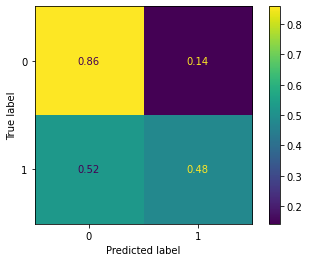

In [119]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

pr_subj = precision_score(y_test, y_pred, pos_label=1)
pr_obj = precision_score(y_test, y_pred, pos_label=0)

rec_subj = recall_score(y_test, y_pred, pos_label=1)
rec_obj = recall_score(y_test, y_pred, pos_label=0)

f1_subj = f1_score(y_test, y_pred, pos_label=1)
f1_obj = f1_score(y_test, y_pred, pos_label=0)

acc = accuracy_score(y_test, y_pred,)

print('Precision subj: {0:.3f}'.format(pr_subj))
print('Precision obj: {0:.3f}'.format(pr_obj))
print('Recall subj: {0:.3f}'.format(rec_subj))
print('Recall obj: {0:.3f}'.format(rec_obj))
print('F1 subj: {0:.3f}'.format(f1_subj))
print('F1 obj: {0:.3f}'.format(f1_obj))
print('F1 mean: {0:.3f}'.format((f1_obj+f1_subj)/2))
print('Accuracy: {0:.3f}'.format(acc))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=clf.classes_)
disp.plot()
plt.show()

## Decision tree

Precision subj: 0.896
Precision obj: 0.455
Recall subj: 0.421
Recall obj: 0.908
F1 subj: 0.573
F1 obj: 0.606
F1 mean: 0.590
Accuracy: 0.591


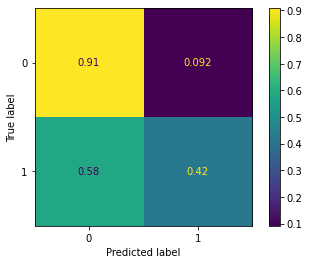

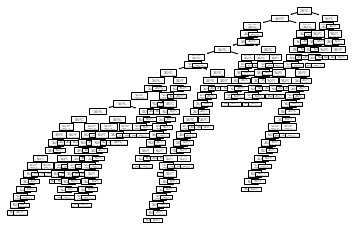

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(criterion='gini', class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

pr_subj = precision_score(y_test, y_pred, pos_label=1)
pr_obj = precision_score(y_test, y_pred, pos_label=0)

rec_subj = recall_score(y_test, y_pred, pos_label=1)
rec_obj = recall_score(y_test, y_pred, pos_label=0)

f1_subj = f1_score(y_test, y_pred, pos_label=1)
f1_obj = f1_score(y_test, y_pred, pos_label=0)

acc = accuracy_score(y_test, y_pred)

print('Precision subj: {0:.3f}'.format(pr_subj))
print('Precision obj: {0:.3f}'.format(pr_obj))
print('Recall subj: {0:.3f}'.format(rec_subj))
print('Recall obj: {0:.3f}'.format(rec_obj))
print('F1 subj: {0:.3f}'.format(f1_subj))
print('F1 obj: {0:.3f}'.format(f1_obj))
print('F1 mean: {0:.3f}'.format((f1_obj+f1_subj)/2))
print('Accuracy: {0:.3f}'.format(acc))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=clf.classes_)
disp.plot()
plt.show()

#tree.plot_tree(clf)
#plt.show()
#plt.savefig('out.pdf')

## Random forest

Precision subj: 0.885
Precision obj: 0.458
Recall subj: 0.437
Recall obj: 0.894
F1 subj: 0.585
F1 obj: 0.606
F1 mean: 0.595
Accuracy: 0.596


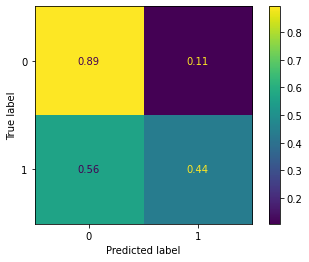

In [131]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='gini', class_weight='balanced_subsample')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

pr_subj = precision_score(y_test, y_pred, pos_label=1)
pr_obj = precision_score(y_test, y_pred, pos_label=0)

rec_subj = recall_score(y_test, y_pred, pos_label=1)
rec_obj = recall_score(y_test, y_pred, pos_label=0)

f1_subj = f1_score(y_test, y_pred, pos_label=1)
f1_obj = f1_score(y_test, y_pred, pos_label=0)

acc = accuracy_score(y_test, y_pred)

print('Precision subj: {0:.3f}'.format(pr_subj))
print('Precision obj: {0:.3f}'.format(pr_obj))
print('Recall subj: {0:.3f}'.format(rec_subj))
print('Recall obj: {0:.3f}'.format(rec_obj))
print('F1 subj: {0:.3f}'.format(f1_subj))
print('F1 obj: {0:.3f}'.format(f1_obj))
print('F1 mean: {0:.3f}'.format((f1_obj+f1_subj)/2))
print('Accuracy: {0:.3f}'.format(acc))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=clf.classes_)
disp.plot()
plt.show()